# Analysis on Gapminder Data

In this case study, we will perform some data cleaning and EDA on a subset of the gapminder data (19th century).

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
colnames = [str(x) for x in range(1800, 1900)]
colnames.append('Life expectancy')

In [45]:
df1800 = pd.read_csv('gapminder.csv', usecols=colnames)

In [46]:
df1800.head()

1800   1801   1802   1803   1804   1805   1806   1807   1808   1809  \
0    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1  28.21  28.20  28.19  28.18  28.17  28.16  28.15  28.14  28.13  28.12   
2    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82  28.82   

           ...             1891   1892   1893   1894   1895   1896   1897  \
0          ...              NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1          ...            27.28  27.27  27.26  27.25  27.24  27.23  27.22   
2          ...              NaN    NaN    NaN    NaN    NaN    NaN    NaN   
3          ...            35.40  35.40  35.40  35.40  35.40  35.40  35.40   
4          ...            28.82  28.82  28.82  28.82  28.82  28.82  28.82   

    1898   1899        Life expectancy  
0    NaN    NaN               Abkhazia  
1  27.21  27.20            Afghanistan  
2    NaN    NaN  Akrotiri and Dhekelia  
3  35.40  35.40                Albania  
4  28.82  28.82                Algeria  

[5 rows x 101 columns]

In [47]:
df1800.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Columns: 101 entries, 1800 to Life expectancy
dtypes: float64(100), object(1)
memory usage: 615.5+ KB


In [48]:
df1800.describe()

1800        1801        1802        1803        1804        1805  \
count  201.000000  201.000000  201.000000  201.000000  201.000000  201.000000   
mean    31.486020   31.448905   31.463483   31.377413   31.446318   31.562537   
std      3.763585    3.755739    3.878204    3.901966    3.877156    3.947957   
min     23.390000   23.390000   23.390000   19.600000   23.390000   23.390000   
25%     29.000000   28.950000   28.900000   28.900000   28.950000   29.000000   
50%     31.800000   31.700000   31.600000   31.500000   31.600000   31.700000   
75%     33.900000   33.900000   33.900000   33.800000   33.870000   33.900000   
max     42.850000   40.300000   44.370000   44.840000   42.830000   44.270000   

             1806        1807        1808        1809     ...            1890  \
count  201.000000  201.000000  201.000000  201.000000     ...      201.000000   
mean    31.615970   31.573134   31.376766   31.310448     ...       32.291045   
std      4.039261    3.917339    4.017228    3.972970     ...        5.907298   
min     23.390000   23.390000   12.480000   13.430000     ...        4.000000   
25%     29.000000   29.000000   28.950000   28.820000     ...       29.200000   
50%     31.800000   31.800000   31.600000   31.500000     ...       32.000000   
75%     34.000000   34.000000   33.870000   33.800000     ...       35.000000   
max     45.820000   43.560000   43.550000   41.740000     ...       50.480000   

             1891        1892        1893        1894        1895        1896  \
count  201.000000  201.000000  201.000000  201.000000  201.000000  201.000000   
mean    32.475373   32.478408   32.533085   32.747214   32.811841   32.895224   
std      5.734794    5.825318    6.018269    5.822354    6.067020    6.344388   
min      8.000000   14.000000    8.000000   22.180000   22.000000   20.000000   
25%     29.200000   29.000000   29.000000   29.200000   29.200000   29.000000   
50%     32.000000   32.000000   32.000000   32.000000   32.000000   32.000000   
75%     35.100000   35.000000   35.000000   35.000000   35.000000   35.000000   
max     51.090000   52.730000   52.580000   52.100000   54.160000   53.840000   

             1897        1898        1899  
count  201.000000  201.000000  201.000000  
mean    32.964279   32.994080   32.962985  
std      6.390669    6.336805    6.325265  
min     19.000000   19.700000   18.900000  
25%     29.200000   29.160000   29.000000  
50%     32.000000   32.000000   32.000000  
75%     35.000000   35.180000   35.180000  
max     54.140000   54.690000   51.620000  

[8 rows x 100 columns]

In [49]:
df1800.shape

(780, 101)

In [50]:
df1800.columns

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '1891', '1892', '1893', '1894', '1895', '1896', '1897', '1898', '1899',
       'Life expectancy'],
      dtype='object', length=101)

Check if life-expectancy has been increasing. Scatter plot between 1800-1899

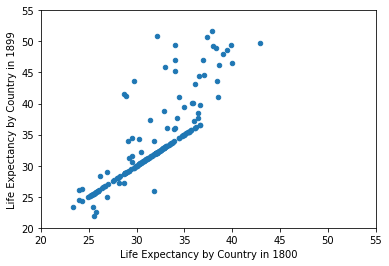

In [51]:
df1800.plot(kind='scatter', x='1800', y='1899')
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')
plt.xlim(20, 55)
plt.ylim(20, 55)
plt.show()

How much average life expectancy changed over each year.

We do some checks to see if our data is consistent:

- 'Life expectancy' is the last column of the DataFrame.
- The other columns contain either null or numeric values.
- The numeric values are all greater than or equal to 0.
#- There is only one instance of each country.

In [52]:
def check_null_or_valid(row_data):
    """Function that takes a row of data,
    drops all missing values,
    and checks if all remaining values are greater than or equal to 0
    """
    no_na = row_data.dropna()[0:-2]
    numeric = pd.to_numeric(no_na)
    ge0 = numeric >= 0
    return ge0

assert df1800.columns[-1] == 'Life expectancy'
assert df1800.iloc[:, :-2].apply(check_null_or_valid, axis=1).all().all()
#assert df1800['Life expectancy'].value_counts()[0] == 1

We reshape the frame so that we have a life expectancy for each country for each year as a single row!
Essentially we melt all the different year columns into one column.

In [53]:
df = pd.read_csv('gapminder.csv')
df.head()
df.drop('Unnamed: 0', axis=1, inplace=True)
gapminder_melt = pd.melt(df, id_vars='Life expectancy')
gapminder_melt.columns = ['country' , 'year', 'life_expectancy']
print(gapminder_melt.head())

                 country  year  life_expectancy
0               Abkhazia  1800              NaN
1            Afghanistan  1800            28.21
2  Akrotiri and Dhekelia  1800              NaN
3                Albania  1800            35.40
4                Algeria  1800            28.82


Checking if datatypes of columns are what we want

In [54]:
gapminder_melt.year = pd.to_numeric(gapminder_melt['year'])
assert gapminder_melt.country.dtypes == np.object
assert gapminder_melt.year.dtypes == np.int64
assert gapminder_melt.life_expectancy.dtypes == np.float64

Checking for invalid names in countries

In [55]:
countries = gapminder_melt['country']
countries = countries.drop_duplicates()
pattern = '^[A-Za-z\.\s]*$'
mask = countries.str.contains(pattern)
mask_inverse = ~mask
invalid_countries = countries.loc[mask_inverse]
print(invalid_countries)

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object


Now we deal with missing data!

In [56]:
assert pd.notnull(gapminder_melt.country).all()
assert pd.notnull(gapminder_melt.year).all()
gapminder = gapminder_melt.dropna()
print(gapminder_melt.shape)

(169260, 3)


Finally with a clean dataset we can do a bit of visualisation!

year
1800    31.486020
1801    31.448905
1802    31.463483
1803    31.377413
1804    31.446318
Name: life_expectancy, dtype: float64
year
2012    71.663077
2013    71.916106
2014    72.088125
2015    72.321010
2016    72.556635
Name: life_expectancy, dtype: float64


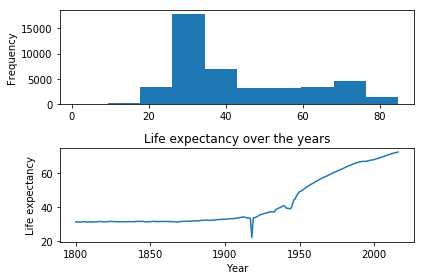

In [57]:
plt.subplot(2, 1, 1)
gapminder_melt.life_expectancy.plot(kind='hist')
gapminder_agg = gapminder_melt.groupby('year')['life_expectancy'].mean()
print(gapminder_agg.head())
print(gapminder_agg.tail())
plt.subplot(2, 1, 2)
gapminder_agg.plot(kind='line')
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')
plt.tight_layout()
plt.show()